In [279]:
import pandas as pd

In [280]:
df = pd.read_csv('new_df.csv')

In [281]:
df.head()

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,new_cases,total_deaths,new_deaths,new_deaths_smoothed,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate
0,-13.000,0.143,4.143,-10.286,-5.857,-7.143,50.0,5.0,1.0,0.429,0.004,0.001,0.000,1060.0,14376.0,0.010,0.001,1125.0,0.001,0.021
1,-16.286,0.000,4.714,-12.714,-8.286,-8.857,86.0,4.0,-1.0,0.286,0.003,-0.001,0.000,1325.0,15701.0,0.011,0.001,1125.0,0.001,0.029
2,-25.857,-10.714,7.286,-21.714,-15.714,-16.143,66.0,7.0,3.0,0.714,0.005,0.002,0.001,1298.0,16999.0,0.012,0.001,1121.0,0.001,0.036
3,-32.429,-14.857,9.714,-28.286,-20.571,-22.714,103.0,10.0,3.0,1.143,0.007,0.002,0.001,3708.0,20707.0,0.015,0.003,1462.0,0.001,0.037
4,-40.571,-21.714,12.857,-36.143,-26.571,-30.857,37.0,10.0,0.0,1.000,0.007,0.000,0.001,157.0,20864.0,0.015,0.000,1295.0,0.001,0.043


<AxesSubplot:ylabel='Density'>

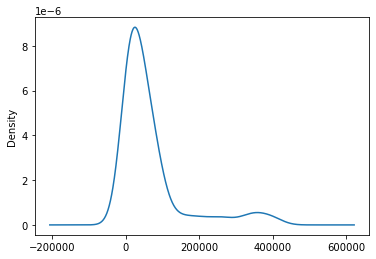

In [282]:
df['new_cases'].plot(kind = 'kde')

In [283]:
from scipy import stats

In [284]:
columns = df.drop(columns = ['new_cases']).columns

In [285]:
columns

Index(['retail_and_recreation', 'grocery_and_pharmacy', 'residential',
       'transit_stations', 'parks', 'workplaces', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'new_tests', 'total_tests', 'total_tests_per_thousand',
       'new_tests_per_thousand', 'new_tests_smoothed',
       'new_tests_smoothed_per_thousand', 'positive_rate'],
      dtype='object')

In [286]:
from sklearn.preprocessing import PowerTransformer

In [287]:
data = df.drop(columns = ['new_cases']).values

In [288]:
pt = PowerTransformer(method = 'yeo-johnson', standardize = False, copy = False)

In [289]:
pt.fit(data)

PowerTransformer(copy=False, standardize=False)

In [290]:
pt.transform(data)

array([[-2.54450715e+00,  1.44620658e-01,  1.26732211e+00, ...,
         1.25909652e+02,  9.99733182e-04,  1.83714516e-02],
       [-2.73984830e+00,  0.00000000e+00,  1.32783232e+00, ...,
         1.25909652e+02,  9.99733182e-04,  2.41601470e-02],
       [-3.14440717e+00, -8.15404174e+00,  1.52548978e+00, ...,
         1.25627455e+02,  9.99733182e-04,  2.87626416e-02],
       ...,
       [-3.90106878e+00, -1.68373191e+01,  1.98486430e+00, ...,
         1.37843873e+04,  1.14856724e+00,  5.31478411e-02],
       [-3.88660335e+00, -1.60813305e+01,  1.97873968e+00, ...,
         1.36396701e+04,  1.13322804e+00,  5.21498216e-02],
       [-3.86550457e+00, -1.47198981e+01,  1.97032698e+00, ...,
         1.35608702e+04,  1.12460207e+00,  5.04038679e-02]])

In [291]:
df_new = pd.DataFrame(data, columns = columns)

In [292]:
data = df['new_cases'].values

In [293]:
data.shape

(419,)

In [294]:
pt_labels = PowerTransformer(method = 'yeo-johnson', standardize = False, copy = False)
pt_labels.fit(data.reshape(-1,1))
pt_labels.transform(data.reshape(-1,1))

array([[ 6.03738583],
       [ 7.29855984],
       [ 6.66451548],
       [ 7.75168365],
       [ 5.39922412],
       [ 8.17119772],
       [ 4.55482471],
       [12.65152741],
       [12.5885163 ],
       [15.92419991],
       [12.77497134],
       [13.23788645],
       [14.34616546],
       [14.6476751 ],
       [14.53205749],
       [14.09712892],
       [16.12759849],
       [15.33507628],
       [14.47086245],
       [15.62274633],
       [14.86685841],
       [16.53204049],
       [17.99563683],
       [16.79110836],
       [17.63902206],
       [17.24213005],
       [17.11114573],
       [17.94600383],
       [17.59948432],
       [17.76376137],
       [19.12089462],
       [19.2185364 ],
       [19.91315959],
       [21.68448073],
       [20.19077172],
       [21.1901708 ],
       [20.85015248],
       [20.81878989],
       [20.44528505],
       [22.24295695],
       [21.21983647],
       [21.09585599],
       [21.44684718],
       [21.69828549],
       [21.48110453],
       [22

In [295]:
pt.lambdas_

array([  2.02782008,   1.16466568,  -0.32768987,   1.59377117,
         0.93013662,   2.07814207,   0.47541978,   0.18803031,
         0.16651291,   0.51287991,  -1.96715107,  -1.98245658,
         0.60597102,   0.34976404,   0.34595009,   0.34094274,
         0.62255149,   0.46609116, -12.12153122])

In [296]:
df_new['new_cases'] = data

<AxesSubplot:ylabel='Density'>

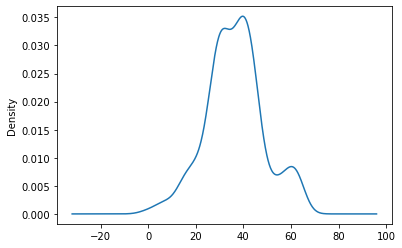

In [297]:
df_new['new_cases'].plot(kind = 'kde') 

In [298]:
df_new.to_csv('boxcox_df.csv', index = False)

In [299]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   retail_and_recreation            419 non-null    float64
 1   grocery_and_pharmacy             419 non-null    float64
 2   residential                      419 non-null    float64
 3   transit_stations                 419 non-null    float64
 4   parks                            419 non-null    float64
 5   workplaces                       419 non-null    float64
 6   total_deaths                     419 non-null    float64
 7   new_deaths                       419 non-null    float64
 8   new_deaths_smoothed              419 non-null    float64
 9   total_deaths_per_million         419 non-null    float64
 10  new_deaths_per_million           419 non-null    float64
 11  new_deaths_smoothed_per_million  419 non-null    float64
 12  new_tests             

# Few Short Learning

In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline
import sys
import random
from pprint import pprint

In [301]:
df = pd.read_csv('boxcox_df.csv')

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   retail_and_recreation            419 non-null    float64
 1   grocery_and_pharmacy             419 non-null    float64
 2   residential                      419 non-null    float64
 3   transit_stations                 419 non-null    float64
 4   parks                            419 non-null    float64
 5   workplaces                       419 non-null    float64
 6   total_deaths                     419 non-null    float64
 7   new_deaths                       419 non-null    float64
 8   new_deaths_smoothed              419 non-null    float64
 9   total_deaths_per_million         419 non-null    float64
 10  new_deaths_per_million           419 non-null    float64
 11  new_deaths_smoothed_per_million  419 non-null    float64
 12  new_tests             

In [303]:
samples = df.drop(columns = ['new_cases'])

In [304]:
labels = df['new_cases']

In [305]:
from sklearn.model_selection import train_test_split

In [306]:
train_samples, valid_samples, train_labels, valid_labels = train_test_split(samples, labels, test_size=0.2)

In [307]:
train_samples, test_samples, train_labels, test_labels = train_test_split(train_samples, train_labels, test_size=0.2)

In [308]:
import sklearn

In [309]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaled_train_samples = scaler.fit_transform(train_samples)
scaled_train_labels = scaler.fit_transform(train_labels.to_numpy().reshape(-1,1))

scaled_valid_samples = scaler.fit_transform(valid_samples)
scaled_valid_labels = scaler.fit_transform(valid_labels.to_numpy().reshape(-1,1))

scaled_test_samples = scaler.fit_transform(test_samples)
scaled_test_labels = scaler.fit_transform(test_labels.to_numpy().reshape(-1,1))

In [310]:
from tensorflow.keras import models, layers
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

In [312]:
scaled_train_samples=scaled_train_samples.reshape(scaled_train_samples.shape[0],scaled_train_samples.shape[1],1)
scaled_valid_samples=scaled_valid_samples.reshape(scaled_valid_samples.shape[0],scaled_valid_samples.shape[1],1)
scaled_test_samples=scaled_test_samples.reshape(scaled_test_samples.shape[0],scaled_test_samples.shape[1],1)

In [509]:
from tensorflow.keras.callbacks import LearningRateScheduler
def step_decay(epoch):
 initial_lrate = 0.1
 drop = 0.5
 epochs_drop = 10.0
 lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
 return lrate

In [537]:
lstm_model = Sequential()
lstm_model.add(LSTM(128, return_sequences=False, input_shape=(scaled_train_samples.shape[1],scaled_train_samples.shape[2])))
lstm_model.add(Dense(units=128, activation='tanh'))
# lstm_model.add(Dense(units=128, activation='tanh'))
lstm_model.add(Dense(1, activation='linear'))
lstm_model.compile(optimizer='rmsprop', loss='mae')
lstm_model.summary()
model_path = 'Bidirectional_LSTM_Multivariate.h5'
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
callbacks=[early_stopings,checkpoint,LearningRateScheduler(step_decay)]
history = lstm_model.fit(scaled_train_samples,scaled_train_labels,epochs=150,verbose=1,validation_data=(scaled_valid_samples, scaled_valid_labels))

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_37 (LSTM)              (None, 128)               66560     
                                                                 
 dense_106 (Dense)           (None, 128)               16512     
                                                                 
 dense_107 (Dense)           (None, 1)                 129       
                                                                 
Total params: 83,201
Trainable params: 83,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
9/9 [==============================] - 6s 136ms/step - loss: 0.1982 - val_loss: 0.0700
Epoch 2/150
9/9 [==============================] - 0s 35ms/step - loss: 0.0776 - val_loss: 0.0753
Epoch 3/150
9/9 [==============================] - 0s 47ms/step - loss: 0.0687 - val_loss: 0.0712
Epoch 4/150
9/9 [=

9/9 [==============================] - 0s 50ms/step - loss: 0.0318 - val_loss: 0.0246
Epoch 76/150
9/9 [==============================] - 1s 59ms/step - loss: 0.0322 - val_loss: 0.0290
Epoch 77/150
9/9 [==============================] - 0s 45ms/step - loss: 0.0305 - val_loss: 0.0384
Epoch 78/150
9/9 [==============================] - 0s 47ms/step - loss: 0.0290 - val_loss: 0.0320
Epoch 79/150
9/9 [==============================] - 1s 67ms/step - loss: 0.0267 - val_loss: 0.0262
Epoch 80/150
9/9 [==============================] - 0s 37ms/step - loss: 0.0282 - val_loss: 0.0316
Epoch 81/150
9/9 [==============================] - 1s 71ms/step - loss: 0.0312 - val_loss: 0.0319
Epoch 82/150
9/9 [==============================] - 0s 37ms/step - loss: 0.0290 - val_loss: 0.0411
Epoch 83/150
9/9 [==============================] - 0s 35ms/step - loss: 0.0309 - val_loss: 0.0231
Epoch 84/150
9/9 [==============================] - 0s 34ms/step - loss: 0.0316 - val_loss: 0.0245
Epoch 85/150
9/9 [=====

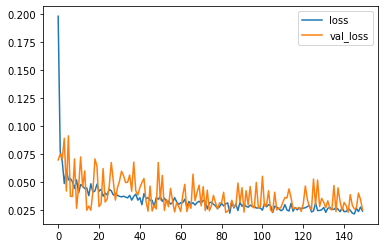

In [538]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();


In [539]:
results = lstm_model.evaluate(scaled_test_samples, scaled_test_labels, batch_size=128)

1/1 [==============================] - 0s 49ms/step - loss: 0.0395


In [540]:
prediction = lstm_model.predict(scaled_test_samples)

3/3 [==============================] - 1s 11ms/step


In [541]:
unscale_res = scaler.inverse_transform(prediction)

In [542]:
unboxcox_res = pt_labels.inverse_transform(unscale_res)

In [543]:
unscale_labels = scaler.inverse_transform(scaled_test_labels)

In [544]:
unboxcox_labels = pt_labels.inverse_transform(unscale_labels.reshape(-1,1))

In [545]:
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(unboxcox_labels, unboxcox_res, squared=False)
rms

13488.427714552687

In [ ]:
]===
][]